<a href="https://colab.research.google.com/github/BBAparna/CRM/blob/master/2675_june__CUTe7321c_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Since this is a shared Colab notebook you will not be able to make changes to it. You should first copy the notebook to your Drive by clicking the following in top menu bar (File > Save a copy in Drive)

## One-time procedure to add the CUTe data folder (10_categories) to your Google Drive

1.   Open the link below, login to Google Drive if not logged in already
2.   Locate the following bar **Shared with me > 10_categories ▼**   
2.   Click the small downside arrow ▼ and select **Add to My Drive**

[Click here - Google Drive shared file for CUTe7321c dataset](https://drive.google.com/drive/folders/13eatyRqMmorr8Ve4TnbOhVsEKdHPOQaE?usp=sharing)




## Connect your Google Drive (repeat this everytime you start a fresh connection to colab)

1.   Execute this cell. A link will appear.
2.   Clicking on the link will lead you to G Drive authentication portal.
3.   Allow the requested permissions and you will be given an autorization code. Copy it
4.   Paste it in the box blow, hit enter.

On successful connection, you should get a message "Mounted at /gdrive" 



In [9]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## Configuring data path

In [0]:
data_path =  "/gdrive/My Drive/cute_10_categories/"

## Now that you have your drive connected and your data_path configured, you can use this environment pretty much like your jupyter notebook

## Note - This is a demo code to demonstrate the use of Colab

**A very trivial neural network architecture with default function parameters is created on purpose. You are expected to experiment and document the impact/importance of things like**


*   Data augmentation
*   Different image resolutions
*   Complex/deeper networks
*   Transfer learning
*   Regularization/Dropout
*   Batch normalization
*   Different activation/loss functions
*   Callback functions (early stopping, variable learning rate, etc)

**Make sure you enable GPU acceleration by clicking Runtime > Change runtime type > Select GPU under Hardware accelerator**

## Importing necessary libraries

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras import optimizers

In [0]:

# Modules to ignore warnings
import warnings               
warnings.filterwarnings('ignore')
# Data Science imports
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os   
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import call

In [0]:
from keras.models import Sequential, Model, load_model
from keras.layers import *
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.utils import to_categorical

In [0]:
from keras.layers import GlobalAveragePooling2D

## Generating train and validation datasets from the data_path

In [15]:
generator = ImageDataGenerator(validation_split=0.2)

train_gen = generator.flow_from_directory(data_path,subset='training',target_size=(32,32))
val_gen = generator.flow_from_directory(data_path,subset='validation',target_size=(32,32))

Found 2984 images belonging to 10 classes.
Found 741 images belonging to 10 classes.


## Initializing model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='valid'))

model.add(Activation('relu'))
model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizers.rmsprop(lr=0.01),loss='categorical_crossentropy',metrics=["accuracy"])

## Fitting the model

In [0]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size

model.fit_generator(generator=train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_gen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

Epoch 1/10
55/93 [================>.............] - ETA: 5:25 - loss: 15.1532 - acc: 0.0597

In [0]:
# Dictionary: key - folder name, value - Category
class_map = {'airplanes': 'flights',
            'BACKGROUND_Google': 'Backgrounds',
            'bonsai': 'Plants',
            'car_side': 'car_side_view',
            'Faces': 'Faces',
            'Faces_easy': 'Faces_easy',
            'grand_piano': 'Piano',
            'Leopards': 'Leopards',
            'Motorbikes': 'Motorbikes',
            'watch': 'Watchs'}

In [18]:
#List of directories in data
classes = os.listdir(data_path)                                  
print(classes)

['watch', 'Motorbikes', 'Leopards', 'grand_piano', 'Faces_easy', 'Faces', 'car_side', 'bonsai', 'BACKGROUND_Google', 'airplanes']


In [0]:
from matplotlib import *



# 2.  Loading the Images from   directory





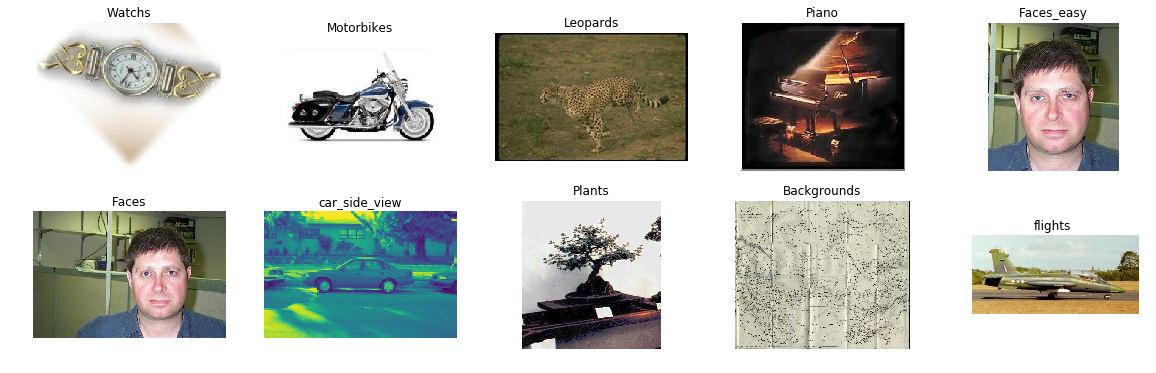

In [19]:
# Plot a sample image from each category

plt.figure(figsize=(20,6))
for ix,i in enumerate(classes):
    f = os.listdir(os.path.join(data_path,i))[0]
    img = mpimg.imread(os.path.join(data_path,i,f))
    plt.subplot(2,5,ix+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_map[i])

In [0]:
##defining function for reading the images
#size= 299
#def read_image(f):
#    im = Image.open(f)
#    #im = im.resize((size, size), PIL.Image.NEAREST)
#    im = np.asarray(im, dtype='float64')
#    return(im)
#
#

In [0]:
#im = read_image('E:\\CUTE_4_june\\cute_10_categories\\watch\\image_0001.jpg')
#print(im.shape)

#Image Augmentation

In [0]:
# Import ImageDataGenerator for image preprocessing/augmentation
# This basically creates multiple copies of train images by jittering(adding noise). 
# This includes rotating, zooming in, flipping, shifting, etc.

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') # 'nearest' is kind of algorithm to fill pixel values while transformation

In [0]:
aug_images_path = 'preview'
f = os.listdir(os.path.join(data_path,classes[7]))[0]
img_path = os.path.join(data_path,classes[7],f)
img = load_img(img_path)       # this is a PIL image
x = img_to_array(img)          # this is a Numpy array with shape (480, 640, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 480, 640, 3)

# Create a directory named 'preview' to save augmented images. 
# Delete, if already exists
if os.path.isdir(aug_images_path):
#     os.system('rm -rf '+aug_images_path)
    shutil.rmtree(aug_images_path)
    
os.system('mkdir '+aug_images_path)
    
# the .flow() command below generates augmented images and saves them to a directory names 'preview'
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=aug_images_path, save_prefix='c0', save_format='jpg'):
    i += 1
    if i > 9:
        break  # otherwise the generator would loop indefinitely


Text(0.5, 1.0, 'Original Image: image_0001.jpg')

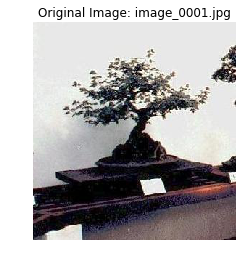

In [24]:
plt.imshow(img)
plt.axis('off')
plt.title('Original Image: '+f)

# This allows us to create 10 images from just one image.

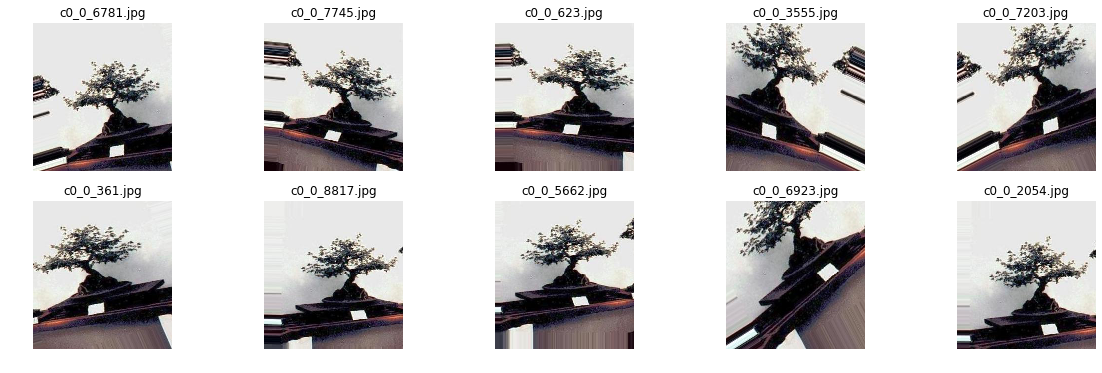

In [25]:
# Plot the augmented images for the above original image
# Read them from 'preview' directory and display them

plt.figure(figsize=(20,6))
aug_images = os.listdir('preview')
for ix,i in enumerate(aug_images):
    img = mpimg.imread(os.path.join('preview',i))
    plt.subplot(2,5,ix+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    if ix==10:
        break

# Data Generator

In [26]:
# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,validation_split=0.3)

# This is a generator that will read pictures found in subfolers of 'train', and generates
# batches of augmented image data on the fly
train_generator = train_datagen.flow_from_directory(directory=data_path, 
                                                    batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=True,subset="training", 
                                                    target_size=(32,32))

Found 2612 images belonging to 10 classes.


In [27]:
# This is the augmentation configuration we will use for validation
val_datagen = ImageDataGenerator(rescale=1/255.)
val_generator = train_datagen.flow_from_directory(directory=data_path, 
                                                    batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=False,subset="validation" ,
                                                    target_size=(32,32))

Found 1113 images belonging to 10 classes.


# cnn model

In [0]:
# Sequential is a container in keras which is used to stack layers in order
# First layer should include the input data shape. This is mandatory. 
# Padding valid implies no padding
# Padding SAME implies enough padding so that output has the same dimensions as input 
# Initial layers identify fewer basic features like edges while later layers identify a lot of more abstract features. 
# Therefore, no. of filters increase as we go deeper into the network. 
# Batchormalization is standard in convolution layers. Improves the convergence time.
# Activation is applied after the Batch normalization
# Dropout could be used for regularization in the fully-connected part of the network

def image_classifier(nb_classes):
    cnnmodel = Sequential()

    cnnmodel.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='valid'))     
    #cnnmodel.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='valid'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Activation('relu'))
    cnnmodel.add(MaxPooling2D(pool_size=(2,2)))

    cnnmodel.add(Conv2D(filters=64, kernel_size=(3, 3),input_shape=(32, 32, 3), padding='valid'))
    #cnnmodel.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Activation('relu'))
    cnnmodel.add(MaxPooling2D(pool_size=(2,2)))

    cnnmodel.add(Conv2D(filters=128, kernel_size=(3, 3),input_shape=(32, 32, 3), padding='valid'))
    #cnnmodel.add(Conv2D(filters=128, kernel_size=(3, 3), padding='valid'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Activation('relu'))
    cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))

    cnnmodel.add(Flatten())
    cnnmodel.add(Dropout(0.1))

    model.add(Dense(128, init='uniform', activation='relu'))
    model.add(Dropout(0.4))

    cnnmodel.add(Dense(nb_classes, activation='softmax'))
    
    return(cnnmodel)

# 5. Building a image classifier

In [0]:
# Cross Entropy is the standard loss function for classification tasks. 
# Adam is the most popular optimizer. Convergence is quick. Could be unstable sometimes. 
# Learning Rate Schedulers could be used for stabilizing training process
# The 'metrics' mentioned will be computed during run time. So that we can monitor the progress.

cnnmodel = image_classifier(nb_classes=10)
cnnmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [35]:
# model.fit returns the history of loss and metrics for train and validation datasets.

hist_1 = cnnmodel.fit_generator(generator=train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_gen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30).history


Epoch 1/30
93/93 [==============================] - 10s 106ms/step - loss: 0.6628 - acc: 0.7903 - val_loss: 0.7722 - val_acc: 0.7616
Epoch 2/30
93/93 [==============================] - 9s 92ms/step - loss: 0.2531 - acc: 0.9220 - val_loss: 0.6344 - val_acc: 0.8166
Epoch 3/30
93/93 [==============================] - 8s 91ms/step - loss: 0.1449 - acc: 0.9657 - val_loss: 0.5564 - val_acc: 0.8279
Epoch 4/30
93/93 [==============================] - 9s 96ms/step - loss: 0.0841 - acc: 0.9795 - val_loss: 0.4952 - val_acc: 0.8350
Epoch 5/30
93/93 [==============================] - 9s 95ms/step - loss: 0.0547 - acc: 0.9906 - val_loss: 0.5568 - val_acc: 0.8392
Epoch 6/30
93/93 [==============================] - 9s 92ms/step - loss: 0.0461 - acc: 0.9919 - val_loss: 0.4237 - val_acc: 0.8660
Epoch 7/30
93/93 [==============================] - 9s 94ms/step - loss: 0.0341 - acc: 0.9950 - val_loss: 0.5344 - val_acc: 0.8702
Epoch 8/30
93/93 [==============================] - 9s 93ms/step - loss: 0.0302 -

Text(0.5, 1.0, 'Accuracy')

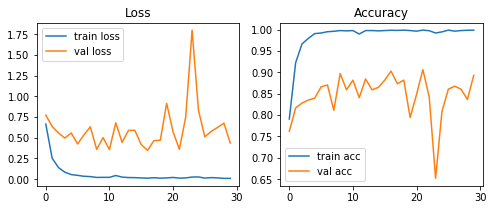

In [63]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
train_loss = plt.plot(hist_1['loss'], label='train loss')
val_loss = plt.plot(hist_1['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
train_loss = plt.plot(hist_1['acc'], label='train acc')
val_loss = plt.plot(hist_1['val_acc'], label='val acc')
plt.legend()
plt.title('Accuracy')

# Image Classification using Globalmaxpooling

In [0]:
def image_classifier_gmp(nb_classes):
    gmpmodel = Sequential()

    gmpmodel.add(Conv2D(32, kernel_size=(5, 5),  padding='valid'))
    gmpmodel.add(BatchNormalization())
    gmpmodel.add(Activation('relu'))
    gmpmodel.add(GlobalMaxPooling2D())

    gmpmodel.add(Conv2D(filters=32, kernel_size=(5, 5), padding='valid'))
    gmpmodel.add(BatchNormalization())
    gmpmodel.add(Activation('relu'))
    gmpmodel.add(GlobalMaxPooling2D())

    gmpmodel.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid'))
    gmpmodel.add(BatchNormalization())
    gmpmodel.add(Activation('relu'))
    gmpmodel.add(GlobalMaxPooling2D())

    gmpmodel.add(Flatten())
    gmpmodel.add(Dropout(0.2))

    gmpmodel.add(Dense(128, init='uniform', activation='relu'))
    gmpmodel.add(Dropout(0.4))

    gmpmodel.add(Dense(nb_classes, activation='softmax'))
    
    return(gmpmodel)

In [0]:
  nb_classes = 10
  gmpmodel = Sequential()

  gmpmodel.add(Conv2D(32, kernel_size=(5, 5),  padding='valid'))
  gmpmodel.add(BatchNormalization())
  gmpmodel.add(Activation('relu'))
  gmpmodel.add(GlobalMaxPooling2D())

  gmpmodel.add(Conv2D(filters=32, kernel_size=(5, 5), padding='valid'))
  gmpmodel.add(BatchNormalization())
  gmpmodel.add(Activation('relu'))
  gmpmodel.add(GlobalMaxPooling2D())

  gmpmodel.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid'))
  gmpmodel.add(BatchNormalization())
  gmpmodel.add(Activation('relu'))
  gmpmodel.add(GlobalMaxPooling2D())

  gmpmodel.add(Flatten())
  gmpmodel.add(Dropout(0.2))

  gmpmodel.add(Dense(128, init='uniform', activation='relu'))
  gmpmodel.add(Dropout(0.4))

  gmpmodel.add(Dense(nb_classes, activation='softmax'))
    

In [0]:
 #Cross Entropy is the standard loss function for classification tasks. 
 #Adam is the most popular optimizer. Convergence is quick. Could be unstable sometimes. 
 #Learning Rate Schedulers could be used for stabilizing training process
 #The 'metrics' mentioned will be computed during run time. So that we can monitor the progress.
gmpmodel = image_classifier_gmp(nb_classes=10)
 
 # gmpmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [0]:

gmpmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [80]:
gmpmodel.summary()

ValueError: ignored

In [85]:
# model.fit returns the history of loss and metrics for train and validation datasets.

gmphist = gmpmodel.fit_generator(generator=train_generator,
                   steps_per_epoch=5,
                   validation_data=val_generator,
                   validation_steps=50,epochs=10)

RuntimeError: ignored

In [0]:
##Loading images from folder
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

# Transfer Learning

In [45]:
#Inception was trained on 299x299x3 size images. Therefore we'll use the same dimentions for out task.
#Nevertheless, in transfer learning, if we are importing only the convolution layers, we can resize the images to other resolutions as well
#Inception is a fairly big network. Hence we used batch size as 64. 
#If larger memory GPUs are available, bigger batch_size could be used.
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                  validation_split=0.3)
train_generator = train_datagen.flow_from_directory(directory=data_path, 
                                                    batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=True, 
                                                    target_size=(299,299),
                                                   subset='training')
val_datagen = ImageDataGenerator(rescale=1/255.)
val_generator = train_datagen.flow_from_directory(directory=data_path, 
                                                    batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=False, 
                                                    target_size=(299,299),
                                                 subset='validation')

Found 2612 images belonging to 10 classes.
Found 1113 images belonging to 10 classes.


# 8. Getting a trained model from Inception

In [0]:
from keras.applications.inception_v3 import InceptionV3


In [0]:
# Get Inception architecture from keras.applications

def inception_tl(nb_classes, freez_wts):
    
    trained_model = InceptionV3(include_top=False,weights='imagenet')
    x = trained_model.output
    x = GlobalAveragePooling2D()(x)
    pred_inception= Dense(nb_classes,activation='softmax')(x)
    incpmodel = Model(inputs=trained_model.input,outputs=pred_inception)
    
    for layer in trained_model.layers:
        layer.trainable=(1-freez_wts)
    
    return(incpmodel)

# 9. Fitting a  inception model on the train data and val data

In [50]:
incpmodel = inception_tl(nb_classes=10, freez_wts=True)
incpmodel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
hist1 = incpmodel.fit_generator(generator=train_generator,
                    steps_per_epoch=50,
                    validation_data=val_generator,
                    validation_steps=50,
                    epochs=20).history


Epoch 1/20
50/50 [==============================] - 130s 3s/step - loss: 1.0253 - acc: 0.7125 - val_loss: 0.4989 - val_acc: 0.8378
Epoch 2/20
50/50 [==============================] - 113s 2s/step - loss: 0.3431 - acc: 0.9157 - val_loss: 0.2947 - val_acc: 0.9040
Epoch 3/20
50/50 [==============================] - 113s 2s/step - loss: 0.2400 - acc: 0.9414 - val_loss: 0.2663 - val_acc: 0.8959
Epoch 4/20
50/50 [==============================] - 112s 2s/step - loss: 0.1830 - acc: 0.9598 - val_loss: 0.2911 - val_acc: 0.8943
Epoch 5/20
50/50 [==============================] - 112s 2s/step - loss: 0.1473 - acc: 0.9711 - val_loss: 0.2679 - val_acc: 0.8982
Epoch 6/20
50/50 [==============================] - 113s 2s/step - loss: 0.1352 - acc: 0.9677 - val_loss: 0.2549 - val_acc: 0.9134
Epoch 7/20
50/50 [==============================] - 111s 2s/step - loss: 0.1190 - acc: 0.9729 - val_loss: 0.2315 - val_acc: 0.9215
Epoch 8/20
50/50 [==============================] - 112s 2s/step - loss: 0.1071 - a

In [0]:
incpmodel.summary()

# 10. Creating a model by using a learning rate

In [0]:
model = inception_tl(nb_classes=10, freez_wts=False)
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam)

# 11. Using Learning Rate Scheduler to get local minima

In [0]:
nb_epochs = 30
init_lr = 0.001
min_lr = 0.000001
f = 10**(np.log10(min_lr/init_lr)/float(nb_epochs))

def poly_decay(epoch):
    ''' This function takes the current epoch as input and return the updated learning rate.
        The learning rate is multiplied by a factor 'f' after each epoch.
        In the first epoch, learning rate is set to 'init_lr'.
        By the end of 'nb_epochs' the learning rate is reduced to 'min_lr' '''
    return(init_lr*(f**epoch))

# ModelCheckpoint monitors the 'val_loss' and saves the model graph and weights at the epoch with least 'val_loss'
# 'save_weights_only'=True, saves only the weights
# 'save_weights_only'=False, saves the weights and the graph
chkp = ModelCheckpoint(filepath='inception_dd.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=0)
lr_schedule = LearningRateScheduler(poly_decay)

Text(0.5, 1.0, 'Learning Rate over Epochs')

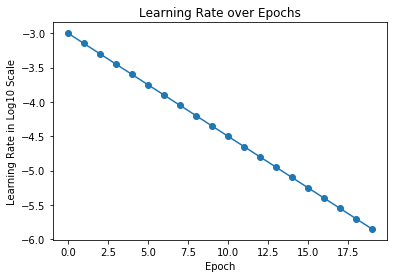

In [22]:
lr_list = [poly_decay(epoch) for epoch in range(nb_epochs)]
plt.scatter(range(nb_epochs), np.log10(lr_list))
plt.plot(np.log10(lr_list))
plt.xlabel('Epoch')
plt.ylabel('Learning Rate in Log10 Scale')
plt.title('Learning Rate over Epochs')

In [29]:
hist = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID, 
                           epochs=nb_epochs, 
                           callbacks=[chkp, lr_schedule]).history
np.savez('inception_dd_history.npz', loss=hist['loss'], acc=hist['acc'], val_loss=hist['val_loss'], val_acc=hist['val_acc'])

Epoch 1/20
93/93 [==============================] - 198s 2s/step - loss: 0.2616 - acc: 0.9191 - val_loss: 3.1667 - val_acc: 0.4110
Epoch 2/20
93/93 [==============================] - 153s 2s/step - loss: 0.0639 - acc: 0.9796 - val_loss: 0.3235 - val_acc: 0.9058
Epoch 3/20
93/93 [==============================] - 160s 2s/step - loss: 0.0290 - acc: 0.9924 - val_loss: 0.1085 - val_acc: 0.9616
Epoch 4/20
93/93 [==============================] - 160s 2s/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.1226 - val_acc: 0.9692
Epoch 5/20
93/93 [==============================] - 161s 2s/step - loss: 0.0117 - acc: 0.9951 - val_loss: 0.2803 - val_acc: 0.9295
Epoch 6/20
93/93 [==============================] - 159s 2s/step - loss: 0.0111 - acc: 0.9961 - val_loss: 0.1058 - val_acc: 0.9679
Epoch 7/20
93/93 [==============================] - 160s 2s/step - loss: 0.0063 - acc: 0.9976 - val_loss: 0.1311 - val_acc: 0.9651
Epoch 8/20
93/93 [==============================] - 160s 2s/step - loss: 0.0038 - a

#  Final TrainingAccuracy 99.85 and Validation Accuracy =97.91

In [147]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_358 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
activation_343 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_359 (Conv2D)          (None, 29, 29, 32)        4128      
_________________________________________________________________
activation_344 (Activation)  (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                401472    
__________

In [0]:
#plt.figure(figsize=(8,3))
#plt.subplot(1,2,1)
#train_loss = plt.plot(hist['loss'], label='train loss')
#val_loss = plt.plot(hist['val_loss'], label='val loss')
#plt.legend()
#plt.title('Loss')
#
#plt.subplot(1,2,2)
#train_loss = plt.plot(hist['acc'], label='train acc')
#val_loss = plt.plot(hist['val_acc'], label='val acc')
#plt.legend()
#plt.title('Accuracy')

# Predictions

In [0]:
val_preds = model.predict_generator(generator=val_generator)


In [0]:
val_preds_class = val_preds.argmax(axis=1)
val_preds_df = pd.DataFrame({'image':val_generator.filenames, 'prediction':val_preds_class})
val_preds_df.head(10)

In [0]:
val_generator.class_indices


In [0]:
Incorrect Predictions

In [0]:
val_incorrect_pred = [i for i in val_preds_df.index.values if int(val_preds_df.image.values[i].split('/')[0][1])!=val_preds_df.prediction.values[i]]
# val_incorrect_pred = [i for i,j in zip(val_preds_df.image.values,val_preds_df.prediction.values) if int(i.split('/')[0][1])!=j]

In [0]:
val_incorrect_pred

In [0]:
plt.figure(figsize=(20,4))
plt.suptitle("Incorrect Predictions", size=32)
for ix,i in enumerate(val_incorrect_pred):
    img = mpimg.imread(os.path.join('val',val_preds_df.image[i]))
    plt.subplot(1,5,ix+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Pred: '+class_map['c'+str(val_preds_df.prediction[i])]+'\n'+'Actual: '+class_map[val_preds_df.image[i].split('/')[0]])
    if ix==4:
        break

# CNN for Image Classification

In [0]:
def plot_images(imgs, labels=None, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    labels_present = False
    # checking if labels is a numpy array
    if type(labels).__module__ == np.__name__:
        labels_present=labels.any()
    elif labels:
        labels_present=True
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        # axis off, but leave a bounding box
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        # plot labels if present
        if labels_present:
            subplot.set_title(labels[i], fontsize=fontsize)
        plt.imshow(imgs[i][:,:,0], cmap='Greys')
        
    plt.show()

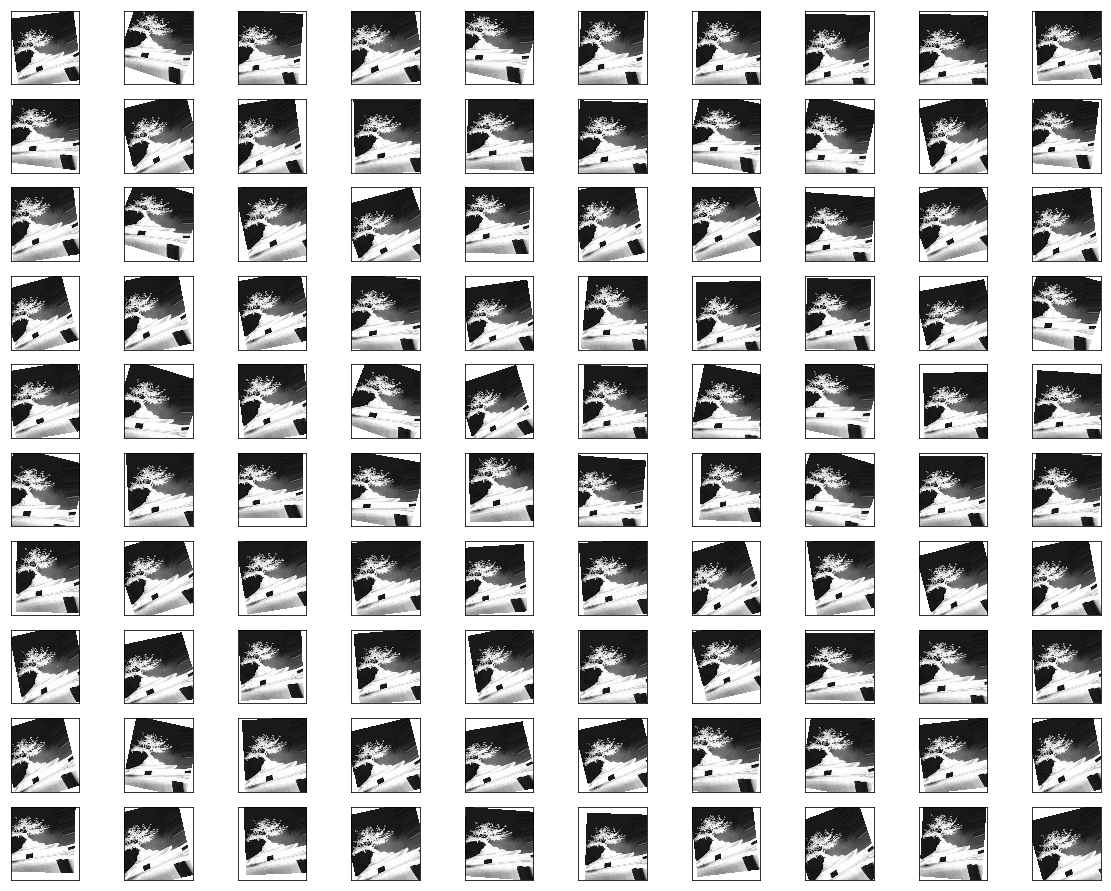

In [61]:
datagen1 = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0
)
batches = 0
max_batches = 100
img_gen = []
for x_batch in datagen1.flow(img.reshape((1,) + img.shape), batch_size=max_batches):
    img_gen.append(x_batch[0])
    batches += 1
    if batches >= max_batches:
        # generator loops indefinetly
        break
        
plot_images(img_gen, rows=10, figsize=(20,16))